email:pooja.bennabhaktula@gmail.com

### **SUPERVISED MACHINE LEARNING**

####**Task2-Predicting scores of students based on hours of study using linear regression.**

### **Importing relevant libraries**

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
url="http://bit.ly/w-data"
data_set=pd.read_csv(url)
data_set.head(20)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [326]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###**Visualizing relationship between variables using matplotlib**

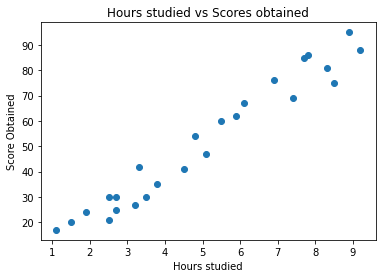

In [327]:

plt.scatter(x=data_set.Hours,y=data_set.Scores)
plt.title('Hours studied vs Scores obtained')
plt.xlabel('Hours studied')
plt.ylabel('Score Obtained')
plt.show()


### **Visualizing relationship  between variables using Seaborn**

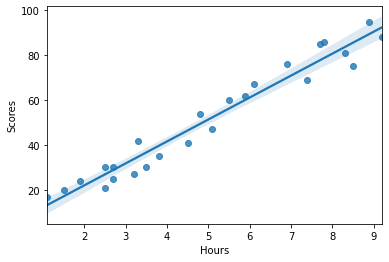

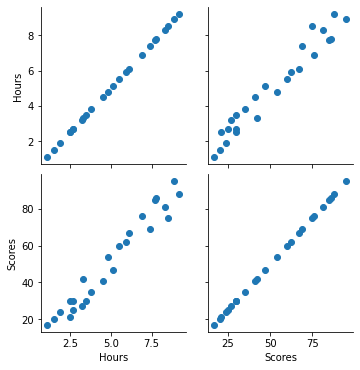

In [328]:
sns.regplot(x="Hours",y="Scores",data=data_set)
b=sns.PairGrid(data_set)
b.map(plt.scatter)

### **Checking information like shape,data-types of elements and memory usage**

In [329]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Checking Range of values across various parameters given in the dataset**

In [330]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Fixing the target variable and seggregating it from the independent variables in the dataset**

In [331]:

X = data_set.iloc[:, :-1].values  
y = data_set.iloc[:, 1].values 


### **Splitting the data into train and test / validation set**

In [332]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_test.shape)
print(X_test)

(5, 1)
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **1.Simple linear regression**

In [333]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
regressor.coef_


array([9.77580339])

### **Making predictions using Model 1**

In [334]:
mod1_pred=regressor.predict(X_test)
mod1_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

### **Comparing Actual vs Predicted values for Model 1**

In [335]:
check=pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['Hours','Actual','predicted'])
check['Deviation']=abs(check['Actual']-check['predicted'])
check

,Hours,Actual,predicted,Deviation
0,1.5,20.0,17.147378,2.852622
1,3.2,27.0,33.766244,6.766244
2,7.4,69.0,74.824618,5.824618
3,2.5,30.0,26.923182,3.076818
4,5.9,62.0,60.160913,1.839087


### **Visualizing relationship between Actual vs Predicted values for Model 1** 

Text(0.5, 1.0, 'Deviation in actual vs predicted values(Simple linear regression)')

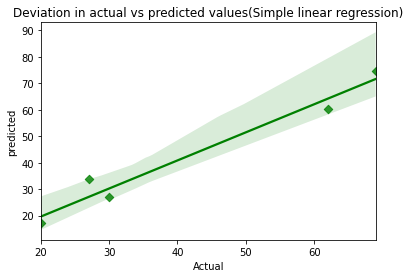

In [336]:
sns.regplot('Actual','predicted',data=check,marker='D',color='green')
plt.title('Deviation in actual vs predicted values(Simple linear regression)')

## **Evaluating Model 1 Accuracy**

In [338]:
from sklearn.metrics import r2_score
r2_score_1=r2_score(y_test,y_pred)
print("r2_score for model 1 is ",r2_score(y_test,y_pred))
from sklearn import metrics
MAE_1=metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute error for model 1 is ",metrics.mean_absolute_error(y_test,y_pred))
RMSE_1=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squared error for model 1 is ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


r2_score for model 1 is  0.9491748734859172
Mean Absolute error for model 1 is  4.071877793635605
Root Mean squared error for model 1 is  4.487643939746131


## **2.Ridge Regularization regression**

In [339]:
from sklearn.linear_model import Ridge
clf=Ridge(alpha=0.1)
clf.fit(X,y)
clf.coef_
clf.intercept_

2.515670713867742

### **Making Predictions Using Model 2**

In [340]:
mod2_pred=clf.predict(X_test)
mod2_pred

array([17.16979959, 33.77781232, 74.80937317, 26.93921884, 60.15524429])

###  **Evaluating Model 2 Accuracy**

In [341]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score_2=(r2_score(y_test,mod2_pred))
print("r2_score for model 2 is :",(r2_score(y_test,mod2_pred)))
MAE_2=mean_absolute_error(y_test,mod2_pred)
print("Mean Absolute Error for model 2 is : ",mean_absolute_error(y_test,mod2_pred))
RMSE_2=np.sqrt(metrics.mean_squared_error(y_test,mod2_pred))
print("Root Mean Square  error for model 2 is : ",np.sqrt(metrics.mean_squared_error(y_test,mod2_pred)))


r2_score for model 2 is : 0.9492887665444383
Mean Absolute Error for model 2 is :  4.0645845523698085
Root Mean Square  error for model 2 is :  4.482612981781025


### **Comparing Actual vs Predicted values for Model 2**

In [342]:
check1=pd.DataFrame(np.c_[X_test,y_test,mod2_pred],columns=['Hours','Actual','Predicted'])
check1['Deviation']=abs(y_test-mod2_pred)
check1

,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.169800,2.830200
1,3.2,27.0,33.777812,6.777812
2,7.4,69.0,74.809373,5.809373
3,2.5,30.0,26.939219,3.060781
4,5.9,62.0,60.155244,1.844756


### **Visualizing Relationship between Actual and Predicted values for Model 2**

Text(0.5, 1.0, 'Deviation in Actual vs Predicted values(Ridge Regression)')

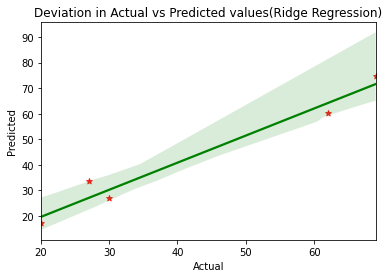

In [343]:
sns.regplot('Actual','Predicted',data=check1,line_kws={'color':'green'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation in Actual vs Predicted values(Ridge Regression)')

### **3.Using Lasso Regularization Model**

In [344]:
from sklearn.linear_model import Lasso
clf3=Lasso(alpha=0.1)
clf3.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### **Making Predictions using Model 3**

In [345]:
model3_pred=clf3.predict(X_test)
model3_pred

array([17.20475421, 33.79584699, 74.78560562, 26.96422055, 60.14640611])

### **Evaluating Model 3 Accuracy**

In [346]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score_3=r2_score(y_test,model3_pred)
MAE_3=mean_absolute_error(y_test,model3_pred)
RMSE_3=np.sqrt(metrics.mean_squared_error(y_test,model3_pred))
print("Mean Absolute Error for Model 3 is :",mean_absolute_error(y_test,model3_pred))
print("r2_score for Model 3 is :",r2_score(y_test,model3_pred))
print("Root Mean squared error for model 3 is ",np.sqrt(metrics.mean_squared_error(y_test,model3_pred)))


Mean Absolute Error for Model 3 is : 4.053214347328307
r2_score for Model 3 is : 0.9494639940937134
Root Mean squared error for model 3 is  4.47486167163936


### **Comparing Actual vs Predicted values for Model 3**

In [347]:
check3=pd.DataFrame(np.c_[X_test,y_test,model3_pred],columns=['Hours','Actual','Predicted'])
check3['Deviation']=abs(y_test-model3_pred)
check3

,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.204754,2.795246
1,3.2,27.0,33.795847,6.795847
2,7.4,69.0,74.785606,5.785606
3,2.5,30.0,26.964221,3.035779
4,5.9,62.0,60.146406,1.853594


### **Visualizing Relationship between Actual and Predicted Values for Model 3**

Text(0.5, 1.0, 'Deviation in Actual vs Predicted Values for Model 3(Lasso Regression)')

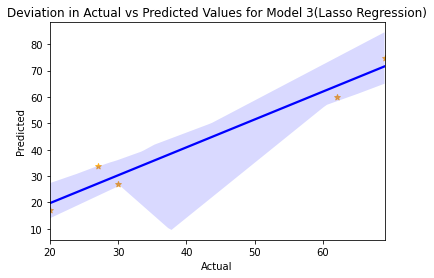

In [348]:
sns.regplot('Actual','Predicted',data=check3,line_kws={'color':'blue'},scatter_kws={'color':'orange'},marker='*')
plt.title('Deviation in Actual vs Predicted Values for Model 3(Lasso Regression)')

### **4.Using Elastic Net Regression**

In [349]:
from sklearn.linear_model import ElasticNet
clf4=ElasticNet(alpha=0.1)
clf4.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### **Predicting values using Model 4**

In [350]:
model4_pred=clf4.predict(X_test)
model4_pred

array([17.45400852, 33.92444859, 74.61612405, 27.14250268, 60.08338281])

### **Evaluating Model 4 Accuracy**

In [351]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score_4=r2_score(y_test,model4_pred)
MAE_4=mean_absolute_error(y_test,model4_pred)
RMSE_4=np.sqrt(mean_squared_error(y_test,model4_pred))
print("r2 score for Model 4 is : ",r2_score(y_test,model4_pred))
print("Mean Absolute Error for Model 4 is:",mean_absolute_error(y_test,model4_pred))
print("Root Mean Squared Error for Model 4 is :", np.sqrt(mean_squared_error(y_test,model4_pred)))

r2 score for Model 4 is :  0.9506311212563421
Mean Absolute Error for Model 4 is: 3.9721357252308236
Root Mean Squared Error for Model 4 is : 4.422886445906904


### **Comparing Actual vs Predicted values for Model4**

In [352]:
check4=pd.DataFrame(np.c_[X_test,y_test,model4_pred],columns=['Hours','Actual','Predicted'])
check4['Deviation']=abs(y_test-model4_pred)
check4

,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.454009,2.545991
1,3.2,27.0,33.924449,6.924449
2,7.4,69.0,74.616124,5.616124
3,2.5,30.0,27.142503,2.857497
4,5.9,62.0,60.083383,1.916617


### **Visualizing Relationship between Actual an Predicted Values for Model 4**

Text(0.5, 1.0, 'Deviation in Actual vs Predicted values for Model 4 (Elastic Net Regression)')

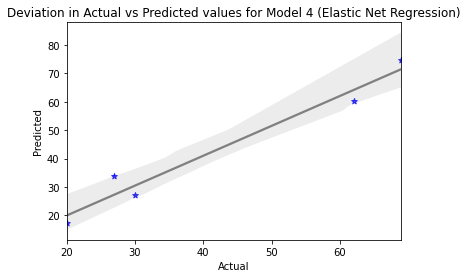

In [353]:
sns.regplot('Actual','Predicted',data=check4,line_kws={'color':'grey'},marker='*',scatter_kws={'color':'blue'})
plt.title('Deviation in Actual vs Predicted values for Model 4 (Elastic Net Regression)')

### **Comparing all Models with Actual and predicted values together**

In [354]:
final=pd.DataFrame()
final['Valid']=y_test
final['LinearRegression']=mod1_pred
final['Bayesian Regression Model']=mod2_pred
final['Lasso']=model3_pred
final['ElasticNet']=model4_pred
final.head()


,Valid,LinearRegression,Bayesian Regression Model,Lasso,ElasticNet
0,20,17.147378,17.169800,17.204754,17.454009
1,27,33.766244,33.777812,33.795847,33.924449
2,69,74.824618,74.809373,74.785606,74.616124
3,30,26.923182,26.939219,26.964221,27.142503
4,62,60.160913,60.155244,60.146406,60.083383


### **Visualizing all models with thier Actual vs Predicted Values(In order to decide for the best one)**

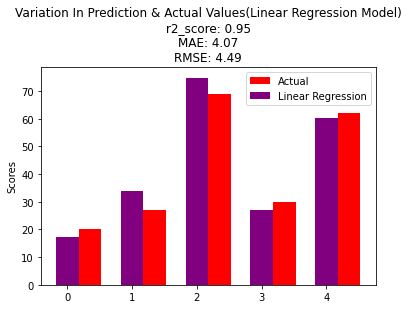

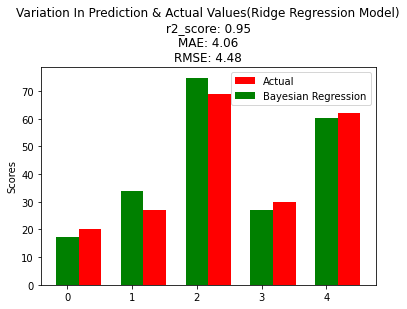

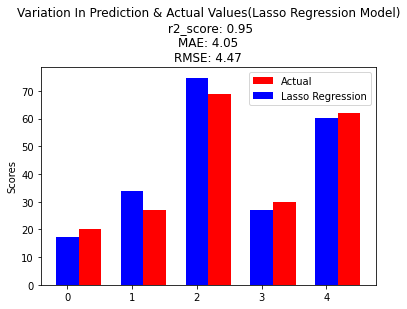

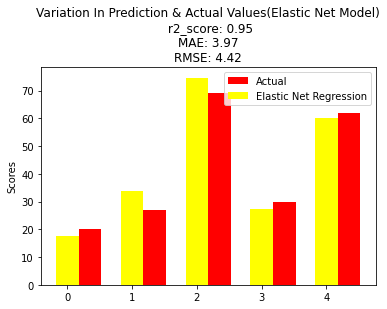

In [355]:
N=np.arange(5)
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='red')
plt.bar(N,mod1_pred,width=0.35,label='Linear Regression',color='purple')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Linear Regression Model)\n r2_score: {} \nMAE: {}\nRMSE: {}'.format(r2_score_1.round(2),MAE_1.round(2),RMSE_1.round(2)))
plt.legend(loc='best')
plt.show()

N=np.arange(5)
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='red')
plt.bar(N,mod2_pred,width=0.35,label='Bayesian Regression',color='green')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Ridge Regression Model)\n r2_score: {} \nMAE: {}\nRMSE: {}'.format(r2_score_2.round(2),MAE_2.round(2),RMSE_2.round(2)))
plt.legend(loc='best')
plt.show()

N=np.arange(5)
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='red')
plt.bar(N,model3_pred,width=0.35,label='Lasso Regression',color='blue')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Lasso Regression Model)\n r2_score: {}\nMAE: {}\nRMSE: {}'.format(r2_score_3.round(2),MAE_3.round(2),RMSE_3.round(2)))
plt.legend(loc='best')
plt.show()

N=np.arange(5)
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='red')
plt.bar(N,model4_pred,width=0.35,label='Elastic Net Regression',color='yellow')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Elastic Net Model)\n r2_score: {}\nMAE: {}\nRMSE: {}'.format(r2_score_4.round(2),MAE_4.round(2),RMSE_4.round(2)))
plt.legend(loc='best')
plt.show()



  **Here we can observe that Elastic Net Model gives Accurate output with minimum error out of all the models. 
  Hence we declare Model 4 as the best performer.**

### Here you can give the model number of hours of study to tell you how  many marks you probably should gain!

In [365]:
Hours=float(input())
print("If a student studies for {} number of hours,".format(Hours))
pred=clf4.predict([[Hours]])
print("Expected Score should be{}".format(pred))

12
If a student studies for 12.0 number of hours,
Expected Score should be[119.18319717]
